#### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

#### Introduction
●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis


##### Descriptive Analytics for Numerical Columns

 ##### ● Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

In [48]:
# import required library
import pandas as pd
import numpy as np


In [49]:
# import the data file and store sales variable
sales = pd.read_csv("D:\Downloads\sales_data_with_discounts.csv")
# print the data
sales

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\binit\AppData\Local\Temp\ipykernel_9680\874678092.py:2: SyntaxWarning: invalid escape sequence '\D'
  sales = pd.read_csv("D:\Downloads\sales_data_with_discounts.csv")


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [50]:
# Select columns with numerical data
numerical_columns = sales.select_dtypes(include='number')  
 # Print column names to see which are numerical 
numerical_columns.columns


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [51]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [52]:
# Calculate mean for each numerical column
means = numerical_columns.mean()
means

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [53]:
# Calculate median for each numerical column
medians = numerical_columns.median()
medians

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [54]:
# Calculate mode for each numerical column
modes = numerical_columns.mode().iloc[0]  # mode() returns a DataFrame; get the first row
modes

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [55]:
# Calculate standard deviation for each numerical column
std_devs = numerical_columns.std()
std_devs

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

##### Data Visualization
●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
●	Histograms:
	Plot histograms for each numerical column.


In [56]:
import matplotlib.pyplot as plt

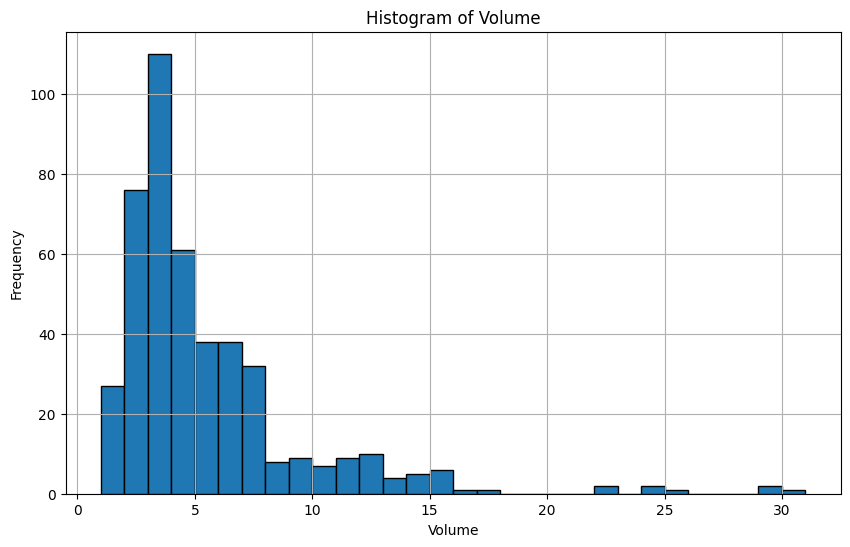

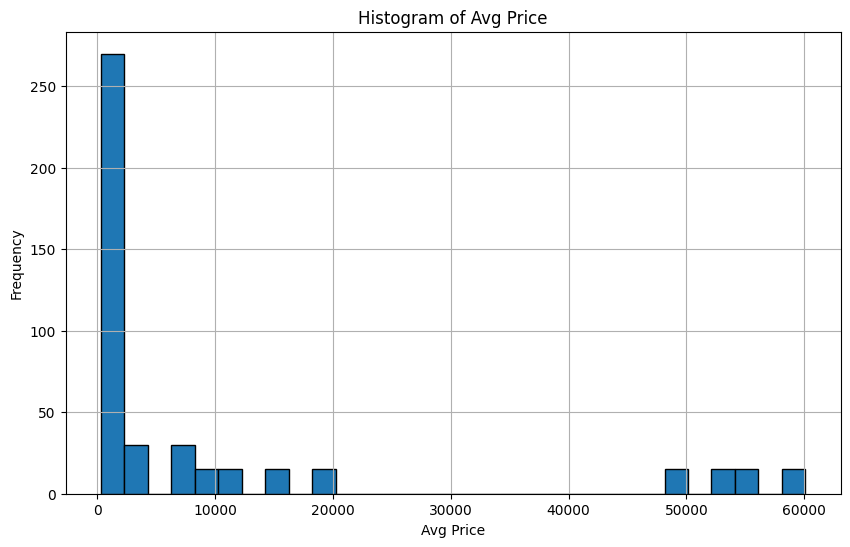

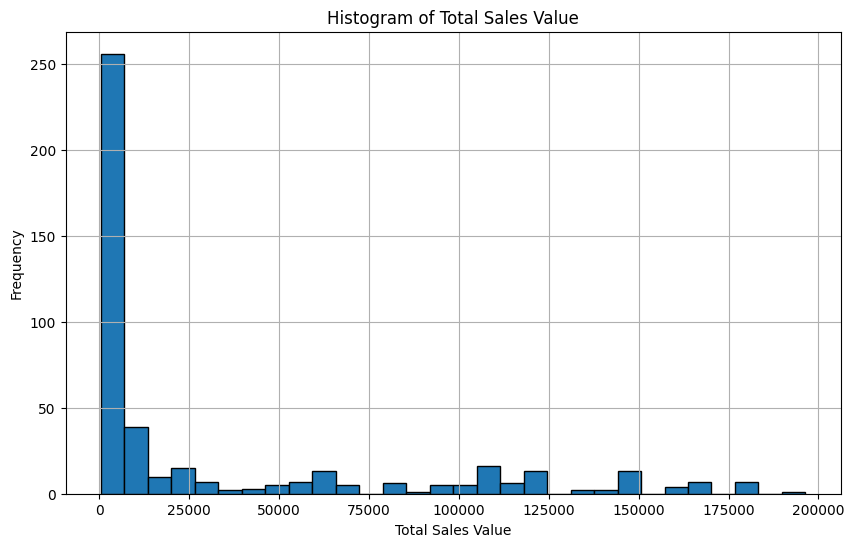

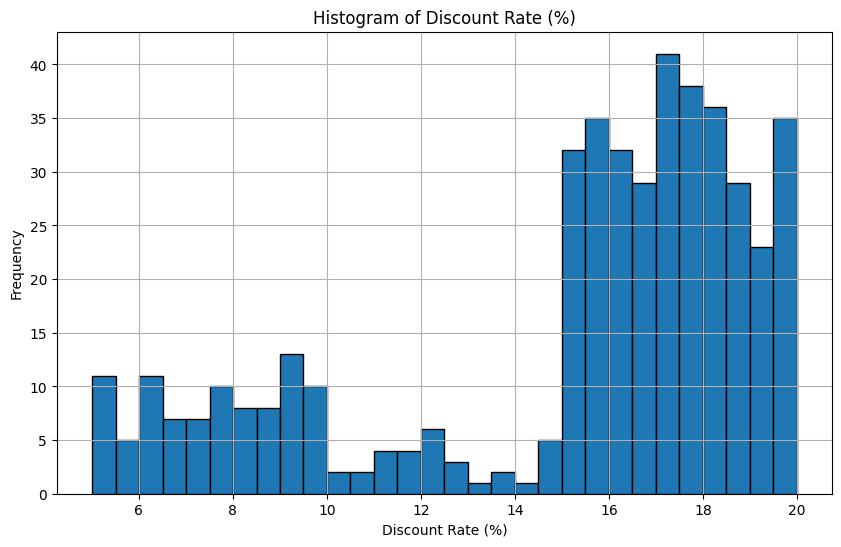

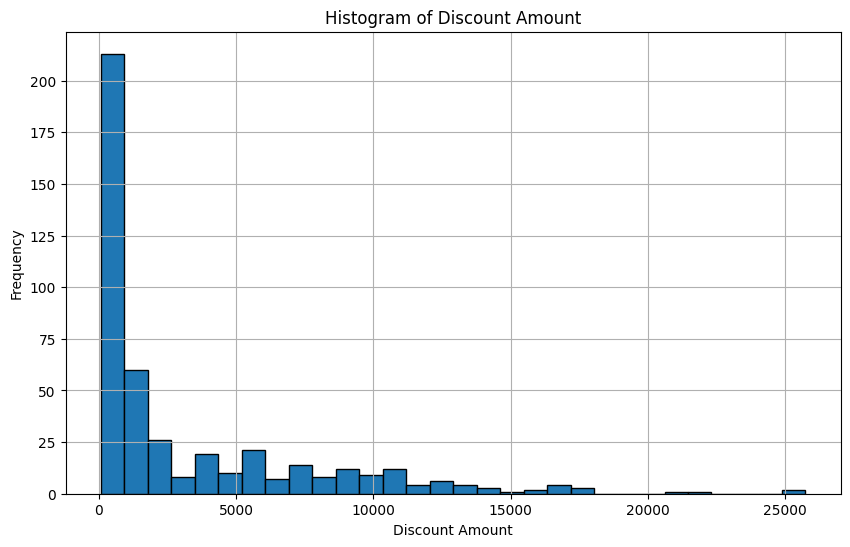

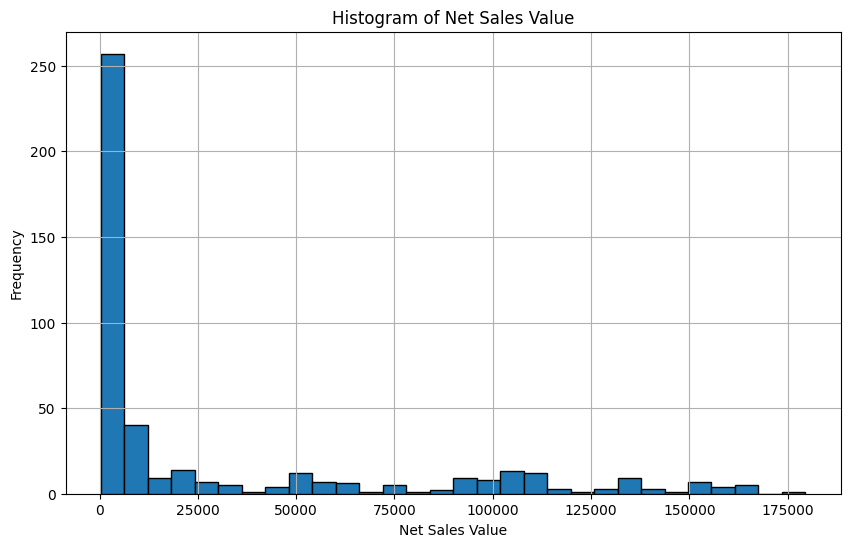

In [57]:
# Plot histograms for each numerical column
for column in numerical_columns.columns:
     # Create a new figure for each histogram
    plt.figure(figsize=(10, 6)) 
    # Plot histogram
    plt.hist(sales[column], bins=30, edgecolor='black') 
     # Set the title of the histogram
    plt.title(f'Histogram of {column}') 
    # Label for the x-axis
    plt.xlabel(column) 
    # Label for the y-axis
    plt.ylabel('Frequency') 
     # Add grid lines for better readability
    plt.grid(True) 
     # Display the histogram
    plt.show() 


In [58]:
import scipy.stats as stats  # For skewness calculation


In [59]:
for column in numerical_columns.columns:
    # Calculate skewness
    skewness = stats.skew(sales[column].dropna())
    print(f'Skewness of {column}: {skewness:.2f}')
    # Identify outliers using IQR method
    Q1 = sales[column].quantile(0.25)
    Q3 = sales[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = sales[(sales[column] < (Q1 - 1.5 * IQR)) | (sales[column] > (Q3 + 1.5 * IQR))]

    print(f'Number of outliers in {column}: {len(outliers)}')

Skewness of Volume: 2.72
Number of outliers in Volume: 44
Skewness of Avg Price: 1.90
Number of outliers in Avg Price: 60
Skewness of Total Sales Value: 1.53
Number of outliers in Total Sales Value: 36
Skewness of Discount Rate (%): -1.06
Number of outliers in Discount Rate (%): 45
Skewness of Discount Amount: 1.91
Number of outliers in Discount Amount: 24
Skewness of Net Sales Value: 1.54
Number of outliers in Net Sales Value: 35


In [60]:
# Calculate skewness
skewness = stats.skew(sales[column].dropna())
print(f'Skewness of {column}: {skewness:.2f}')

    # Identify outliers using IQR method
Q1 = sales[column].quantile(0.25)
Q3 = sales[column].quantile(0.75)
IQR = Q3 - Q1
outliers = sales[(sales[column] < (Q1 - 1.5 * IQR)) | (sales[column] > (Q3 + 1.5 * IQR))]

print(f'Number of outliers in {column}: {len(outliers)}')


Skewness of Net Sales Value: 1.54
Number of outliers in Net Sales Value: 35


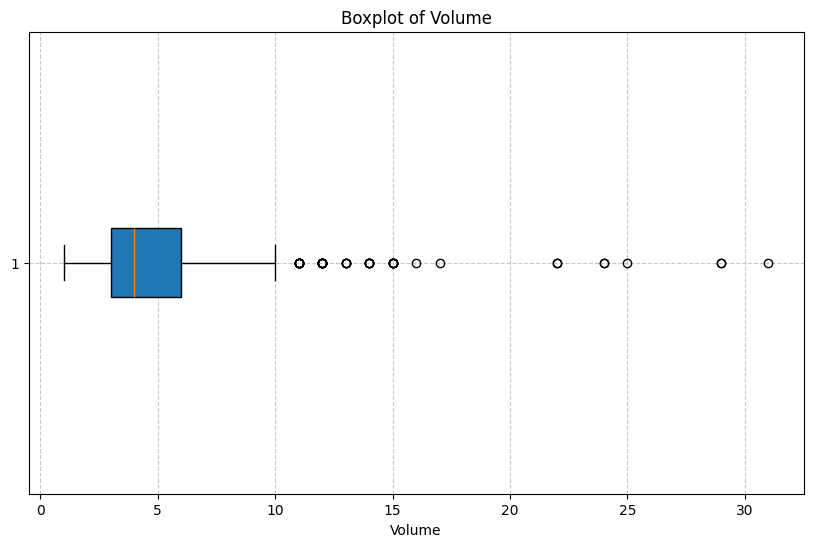

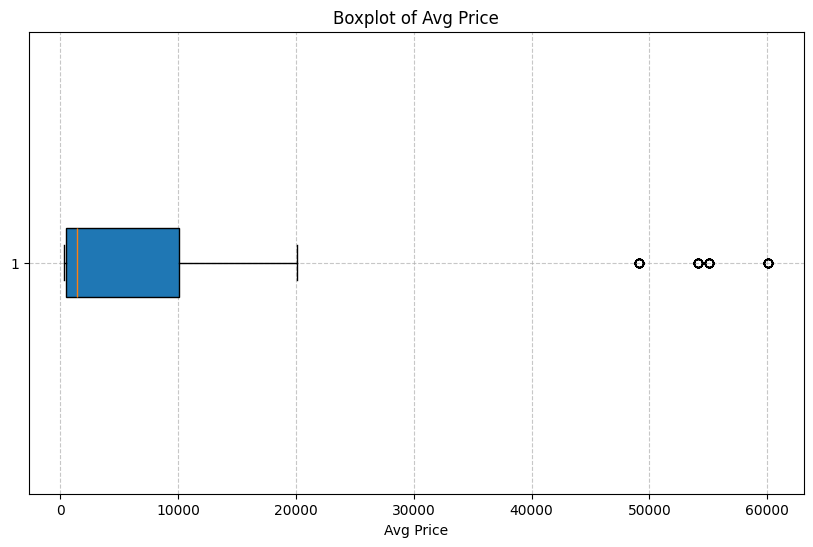

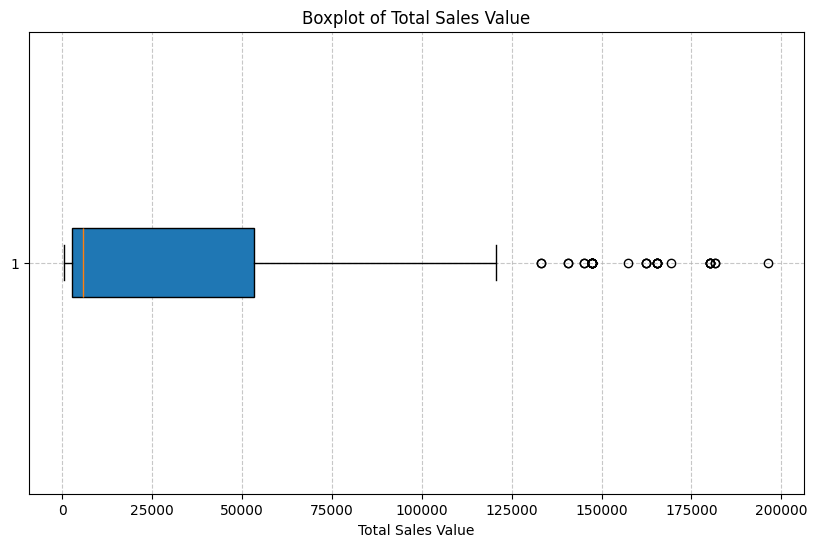

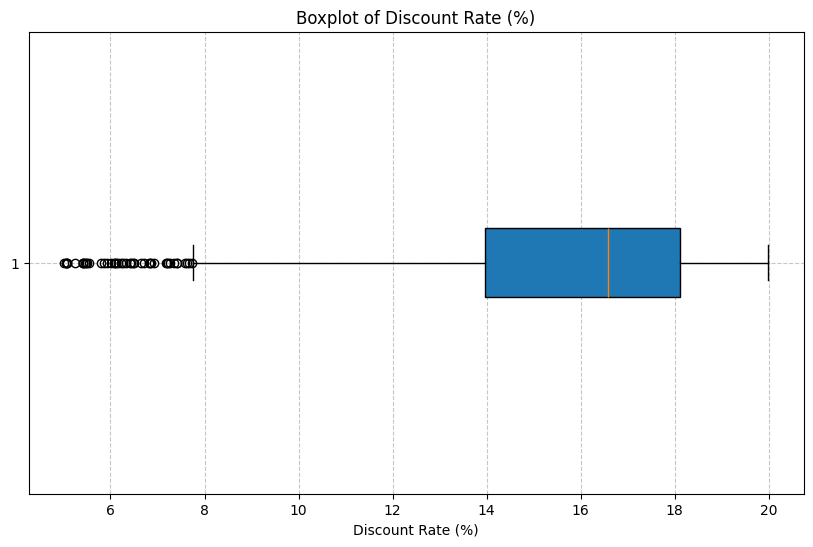

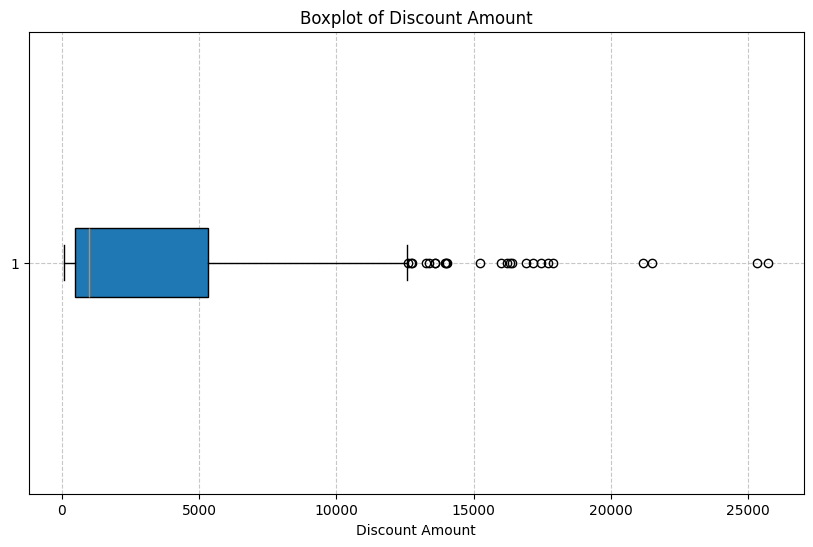

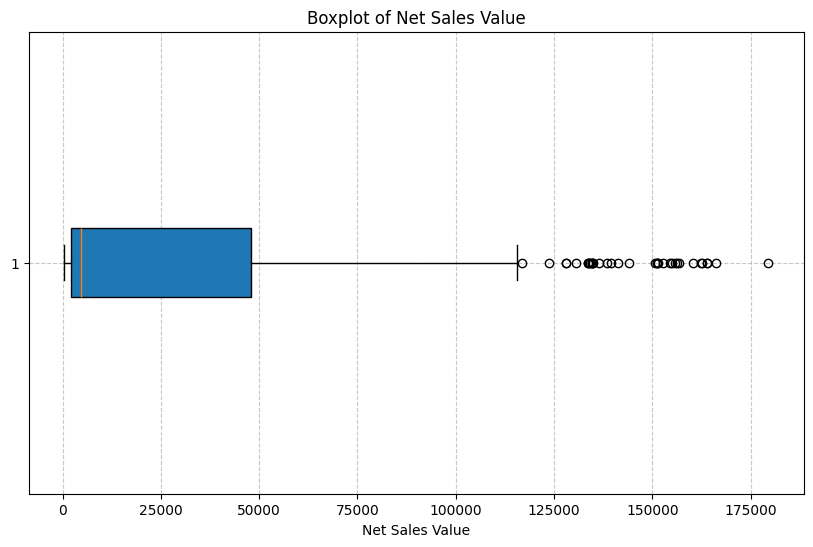

In [61]:
# Create boxplots for each numerical column
for column in numerical_columns.columns:
     # Set the size of the figure
    plt.figure(figsize=(10, 6)) 
    plt.boxplot(sales[column].dropna(), vert=False, patch_artist=True)
    # Set the title of the plot
    plt.title(f'Boxplot of {column}')  
    # Label for the x-axis
    plt.xlabel(column)  
    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)  
    # Display the boxplot
    plt.show()  


In [62]:
# Identify categorical columns
categorical_columns = sales.select_dtypes(include='object')
categorical_columns

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


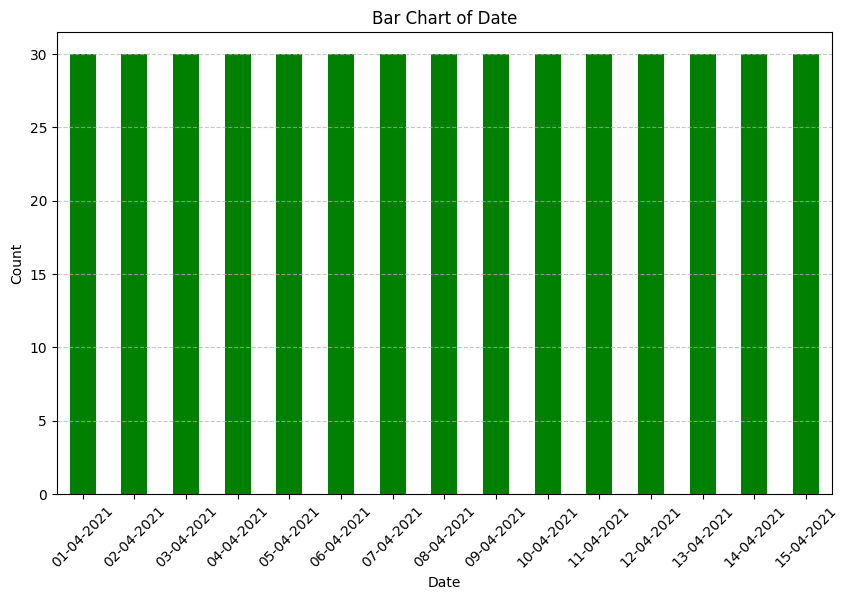

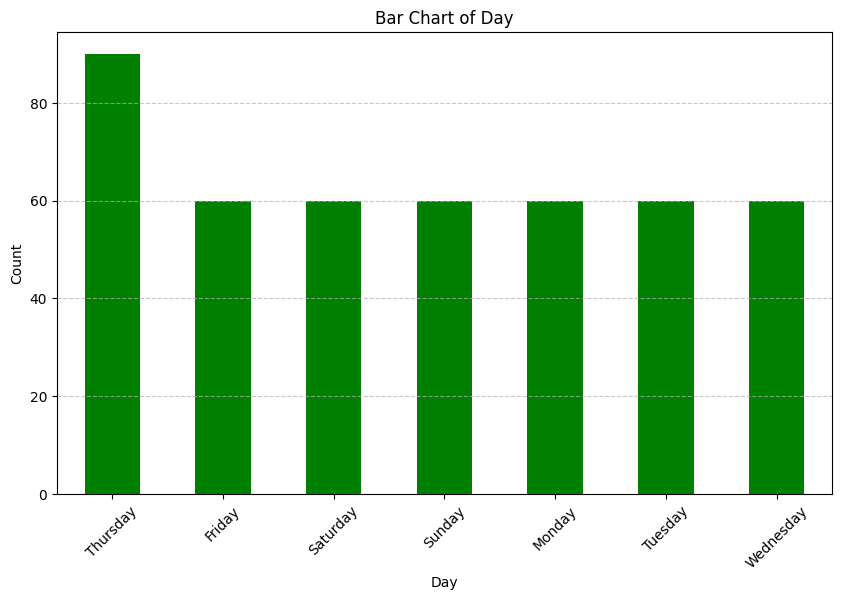

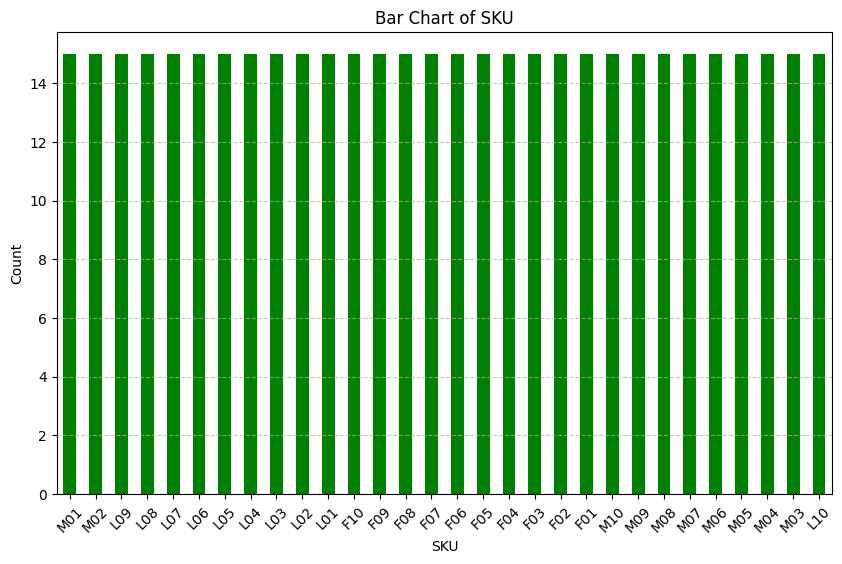

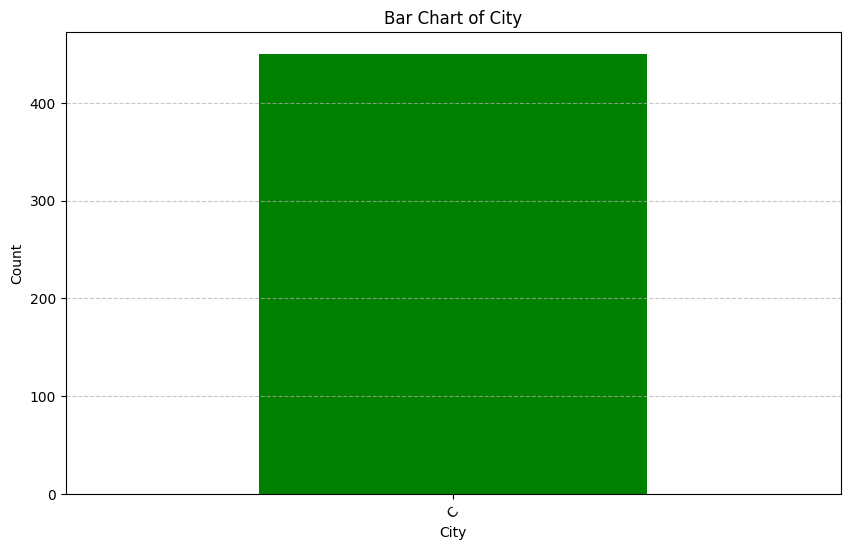

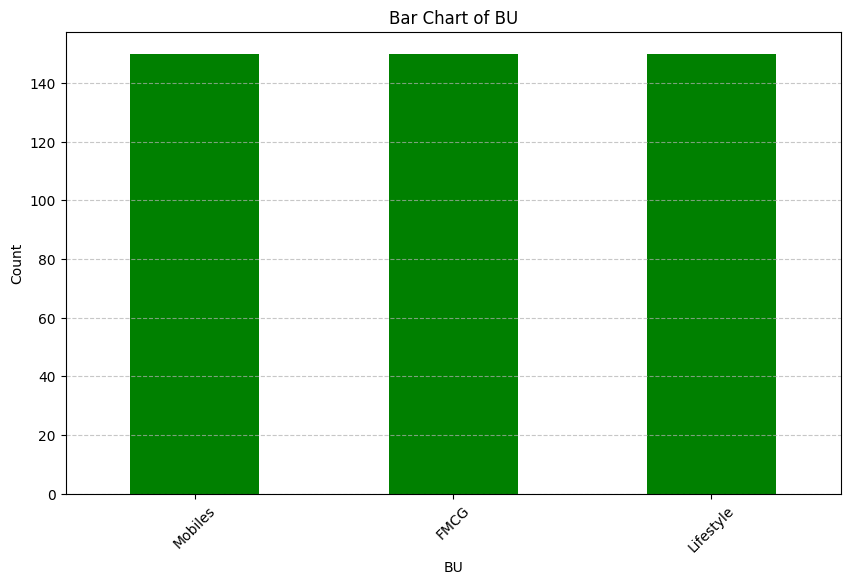

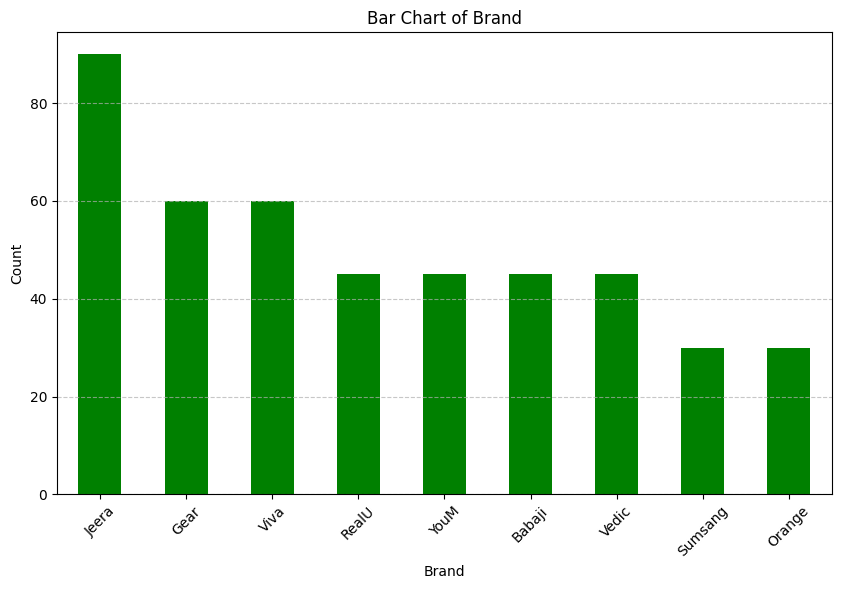

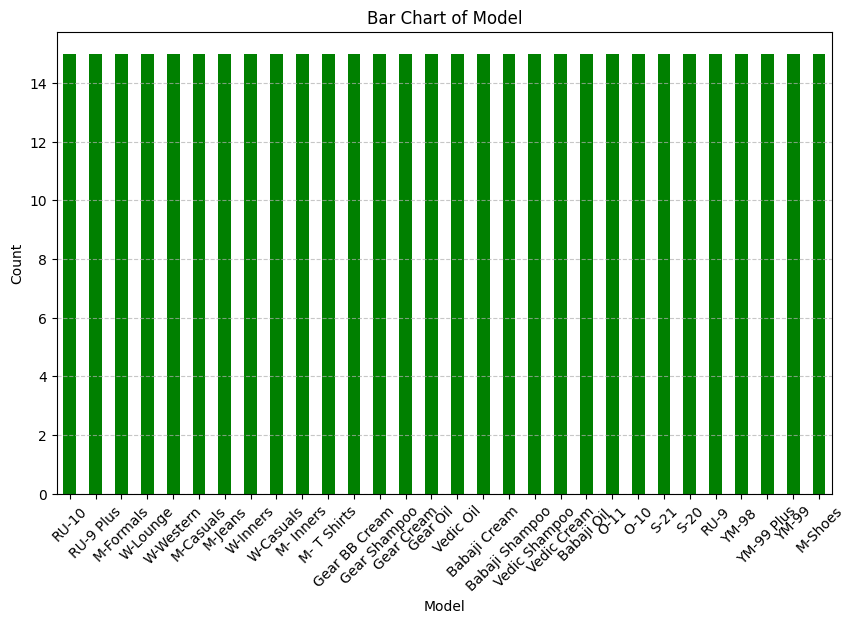

In [63]:
# Create bar charts for each categorical column
for column in categorical_columns.columns:
    # Set the size of the figure
    plt.figure(figsize=(10, 6))  
    # Create a bar chart
    sales[column].value_counts().plot(kind='bar', color='g')  
    # Set the title of the plot
    plt.title(f'Bar Chart of {column}')  
    # Label for the x-axis
    plt.xlabel(column)  
    plt.ylabel('Count')  # Label for the y-axis
    # Label for the y-axis
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)  
    # Add grid lines for the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    # Display the bar chart
    plt.show()  


In [64]:
# importing required libraryies
from sklearn.preprocessing import StandardScaler

In [66]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
# Copy the original numerical data
standardized_data = numerical_columns.copy()  
# Standardize the numerical columns
standardized_data[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

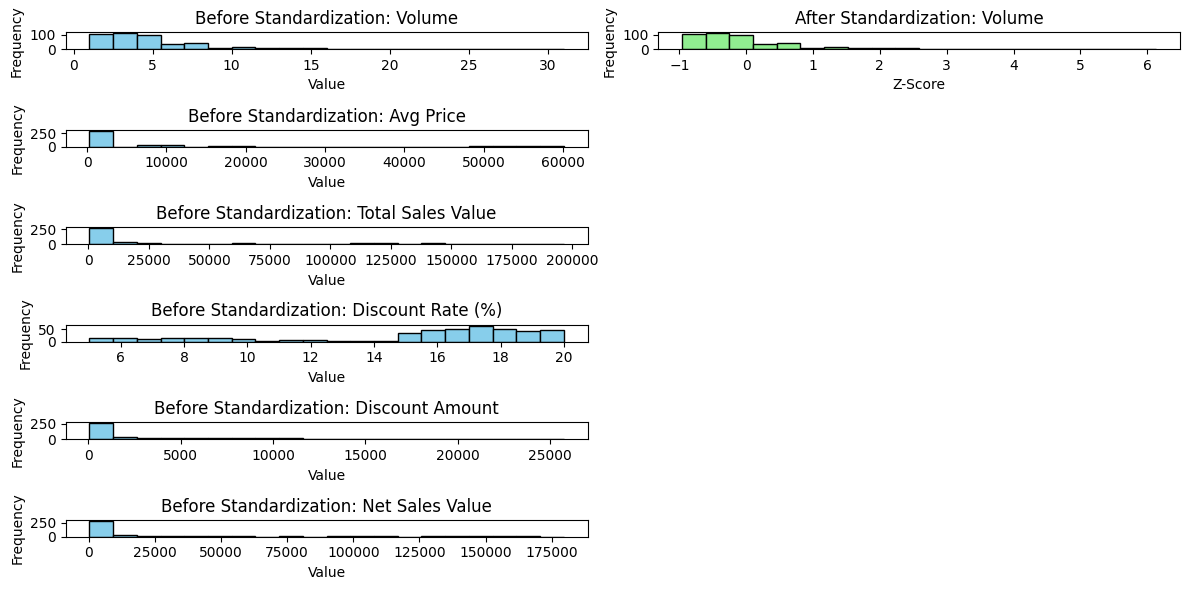

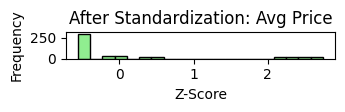

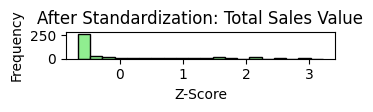

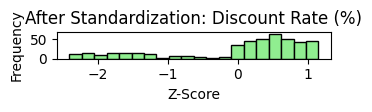

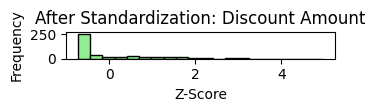

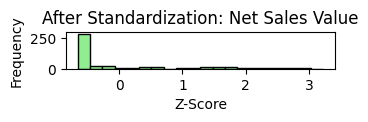

In [67]:
# Show before and after comparisons
# Plot before standardization
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(len(numerical_columns.columns), 2, i * 2 - 1)
    plt.hist(numerical_columns[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Before Standardization: {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Plot after standardization
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(len(numerical_columns.columns), 2, i * 2)
    plt.hist(standardized_data[column].dropna(), bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'After Standardization: {column}')
    # Label for the x-axis
    plt.xlabel('Z-Score')
    # Label for the y-axis
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [47]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(sales, columns=categorical_columns.columns)
data_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
